In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### EDA End to End

* Univariate Analysis
* Bivariate Analysis
     * Num vs Num
     * Cat vs Num
     * Cat vs Cat

* Missing values
* Outlier Analysis and removal - Boxplot & Normal Distribution.
* **Feauture Engineering**
* **Statistical Analysis to verify the relation between Predictor & TGT**
* Data Transformation, Scaling & Encoding ~ Data Preprocessing Stage 

* **Model Building**

* Data =>input => Model => Predicted Value..

### Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [39]:
sales=pd.read_csv("~/Downloads/train_v9rqX0R.csv")

In [40]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
# sales.shape[0] ~ gives no. of rows
# sales.shape[1] ~ gives no. of columns

In [41]:
#Check Shape of the data
#No. of Rows & Columns
sales.shape

(8523, 12)

In [42]:
#Check the Head of Data ~ Preview the Data
#Head will return First 5 and Tail last 5
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [43]:
# predictors vs target ::independent variables vs Dependent Variable...
#
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
#List of Numerical Variables
nums=sales.select_dtypes(include=np.number).columns

In [45]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# Univariate Analysis

In [15]:
len(nums)

5

In [16]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

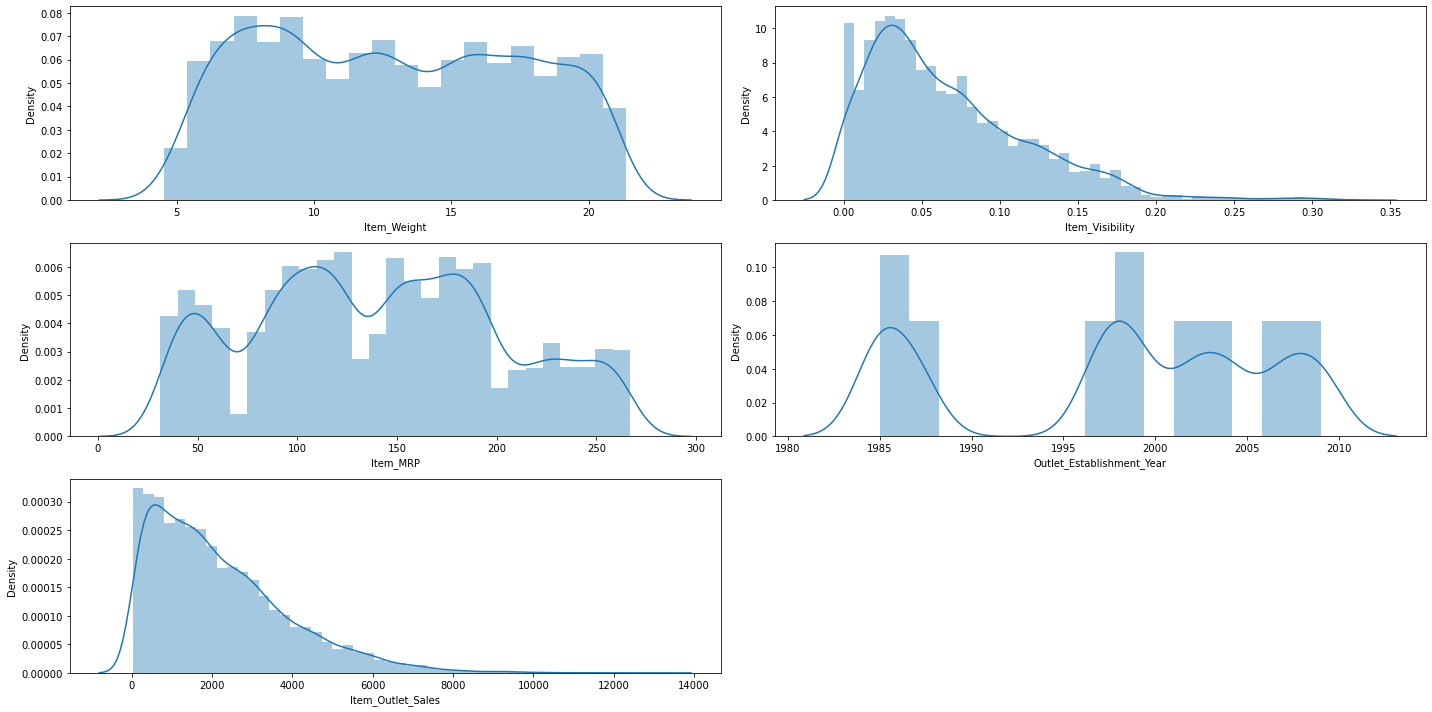

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings("ignore")

#plot dimensions
plt.rcParams['figure.figsize']=[20,10]
n_rows=3
n_cols=2
counter=1

for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.distplot(sales.loc[:,i].dropna())
    counter=counter+1
    
plt.tight_layout()   # to remove the clutters
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

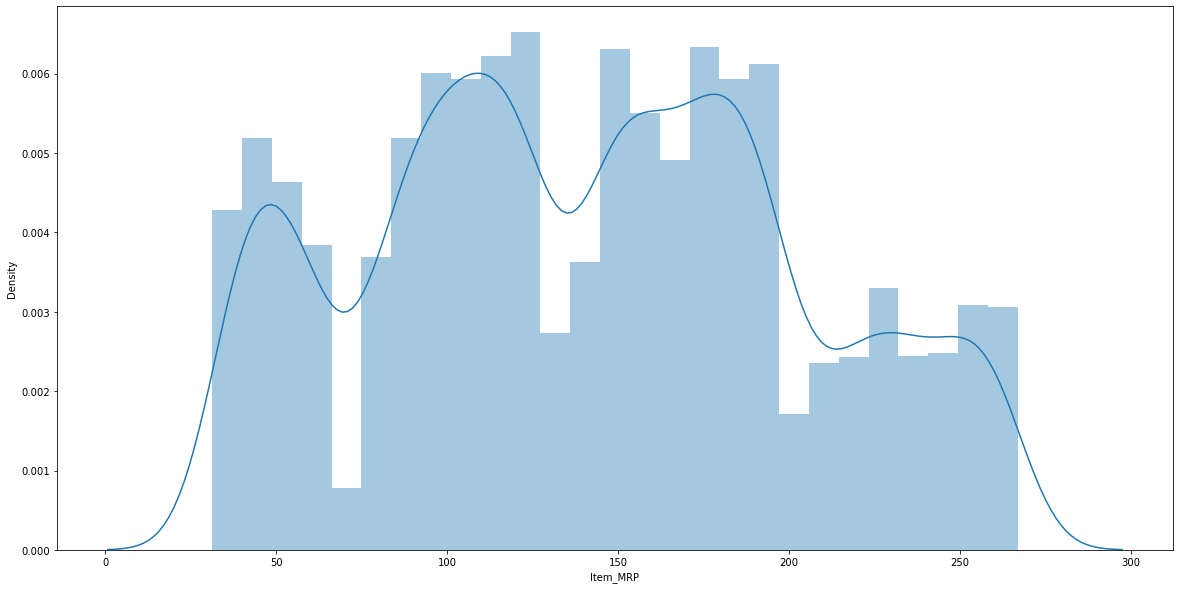

In [19]:
sns.distplot(sales.loc[:,"Item_MRP"])

### Inferences

* Item Outlet Sales is Positively Skewed in nature.
* No Pattern seen in Outlet Est Year
* Item MRP is found to be multimodal in nature.
* Item Weight is Uniform in Nature.
* Item Visibility  is Skewed which means that there are some items that have a higher visibility than the rest.


In [ ]:
# Categories...

<AxesSubplot:>

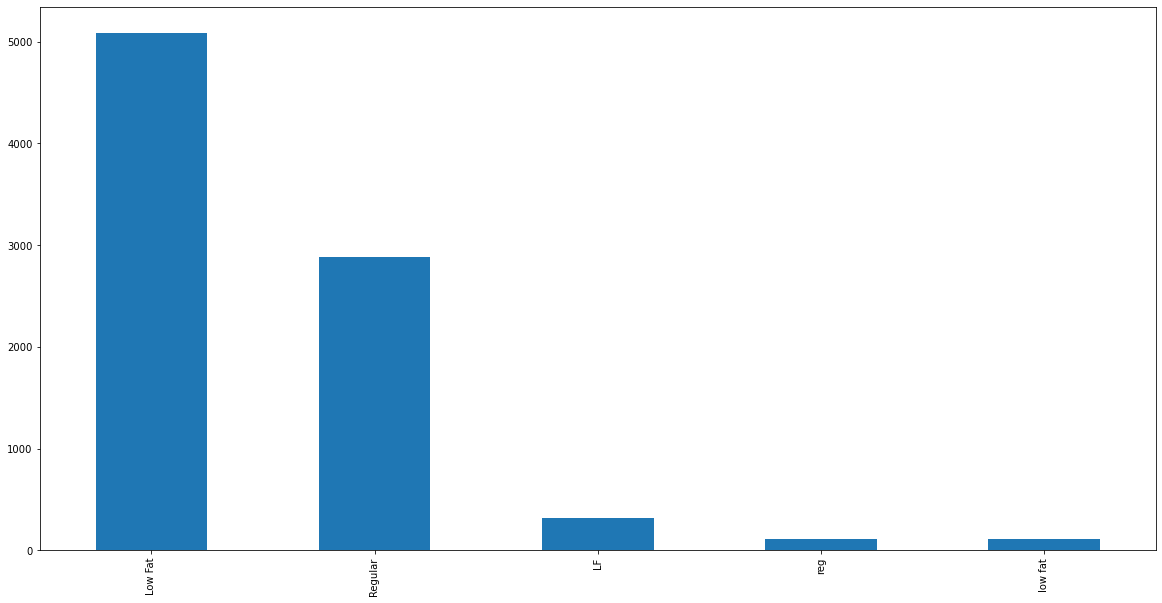

In [15]:
# Item Fat Content

sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [46]:
# replace the LF reg and low fat into the resp cat...

sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],
                               value=['Low Fat','Low Fat','Regular'],
                               inplace=True)
                                      

<AxesSubplot:>

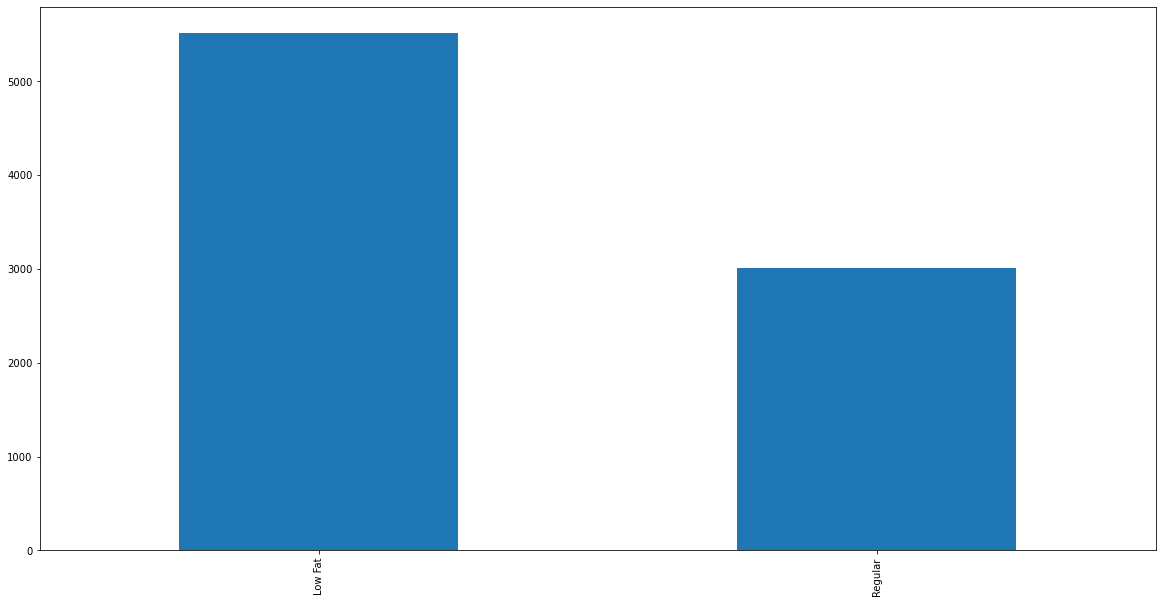

In [21]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

<AxesSubplot:>

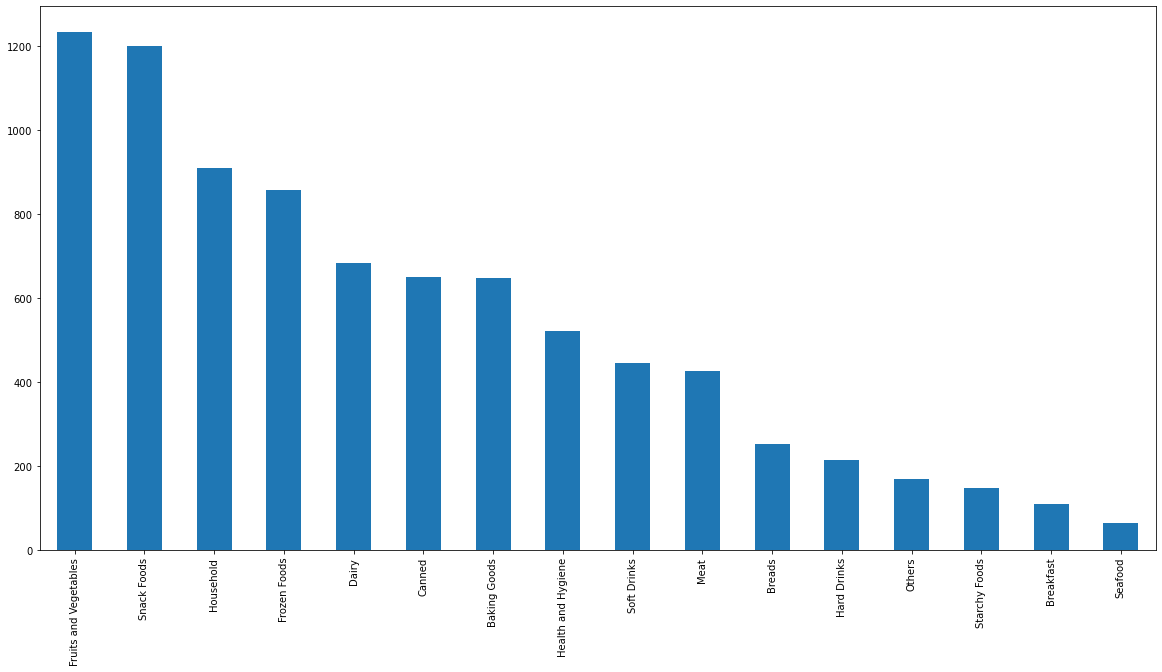

In [23]:
# Item Type

sales.Item_Type.value_counts().plot(kind='bar')

In [25]:
sales.Item_Type.value_counts().index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

Inference:

Top 05 Selling Items are

* Fruits and Vegetables
* Snack Foods
* Household
* Frozen Foods
* Dairy

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

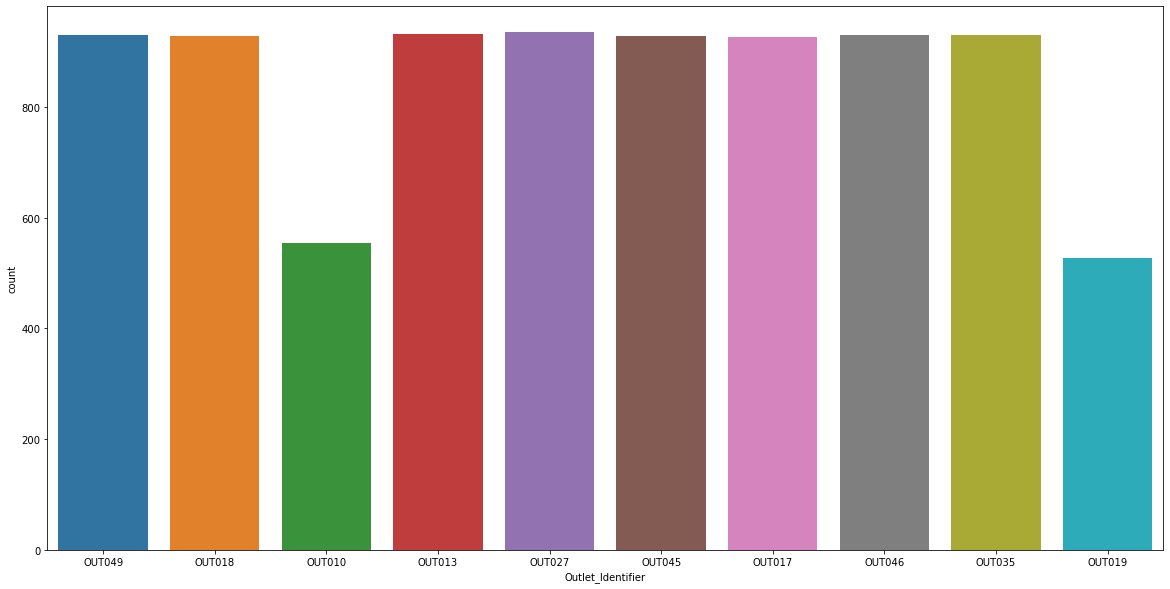

In [27]:
 # Outlet id
sns.countplot(sales.Outlet_Identifier)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

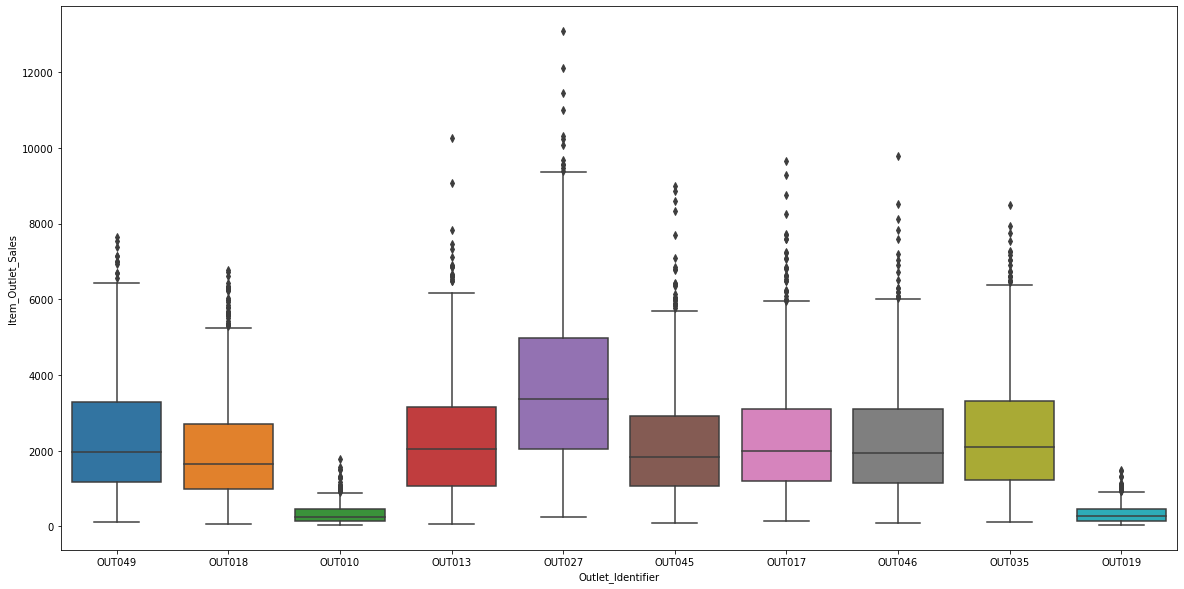

In [29]:
# Hypo: Outlet10 and Outlet19 have the lowest sales in comp to others...

sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales)

Most Performing Outlet is OUT027

In [30]:
# Outlet Size

sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
sales.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [32]:
sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Summary Univariate Analysis

* OUT027 is the maximum revenue generator for the business.
* We realize that this store is mostly opened in Tier 03 cities and the type of Outlet is **Medium** Size Outlet
* The items that are sold in the Outlet are Fruits & Vegetables, Snacks, Frozen, Household followed by Dairy Items
* Most of the items are generally Low Fat and Regular Types
* Lowest Performing Outlets - OUT010 & OUT019.
* S1 appears to be the most commonly seen outlet across the locations.

### Bivariate Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

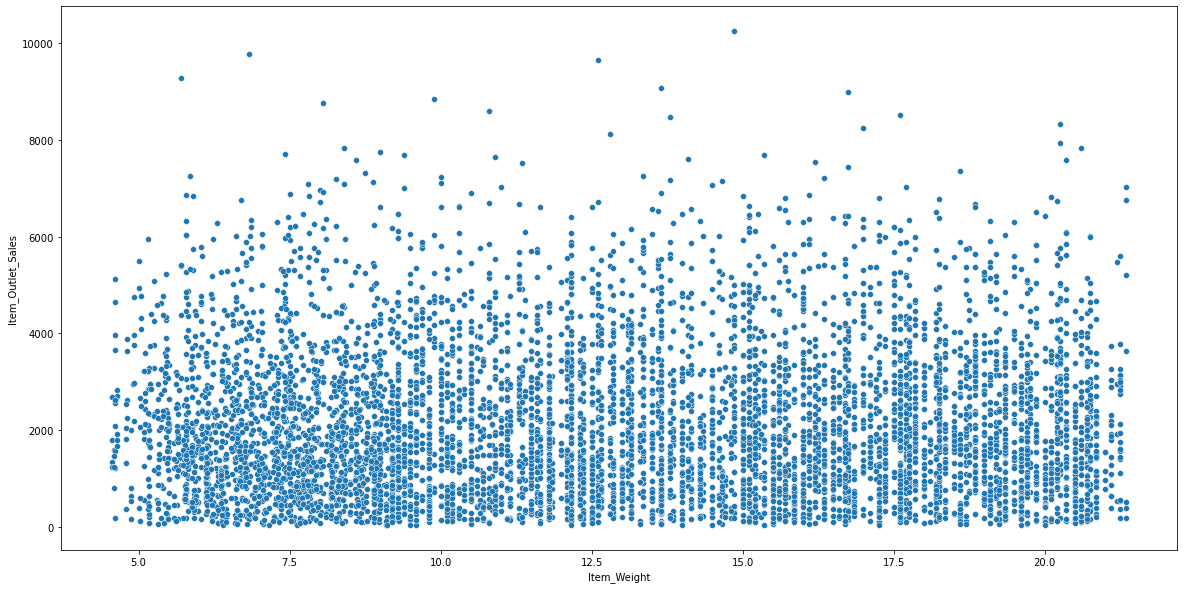

In [33]:
# Num vs Num - Scatterplot
# Item Weight vs Sales

sns.scatterplot(sales.Item_Weight,sales.Item_Outlet_Sales)

# No Pattern with Sales

In [34]:
# Check the correlation between Sales and weight
sales.loc[:,["Item_Weight","Item_Outlet_Sales"]].corr()

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.014123
Item_Outlet_Sales,0.014123,1.000000


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

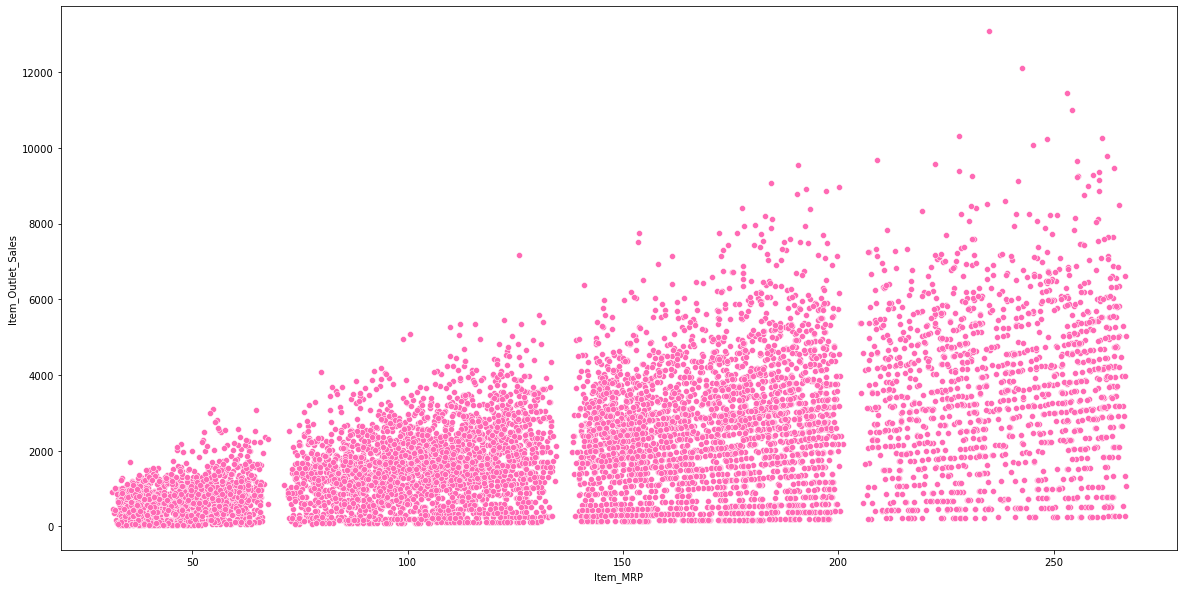

In [35]:
# Item MRP vs Sales

sns.scatterplot(sales.Item_MRP,sales.Item_Outlet_Sales,color='hotpink')

In [36]:
sales.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

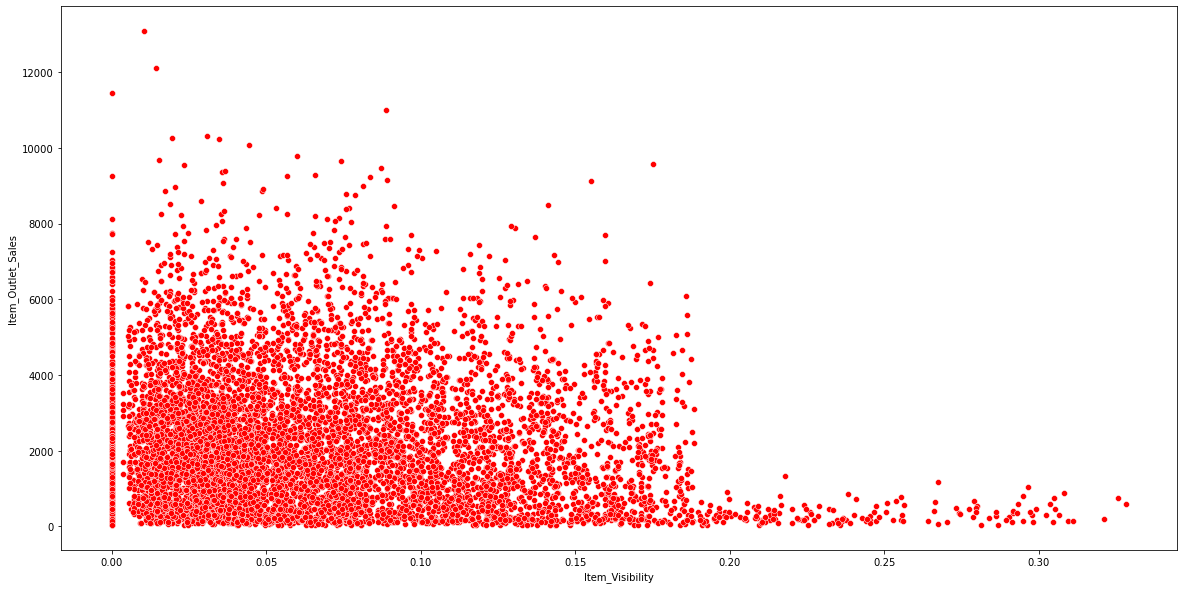

In [37]:
# Item Visibility vs Sales

sns.scatterplot(sales.Item_Visibility,sales.Item_Outlet_Sales,color='red')

### Inference

* Item Visibility vs Sales shows that as Visibility increases, Sales decreases.
* Item MRP vs Sales shows 04 clusters & correlation is also good.

In [38]:
sales.loc[:,["Item_MRP","Item_Outlet_Sales"]].corr()

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567574
Item_Outlet_Sales,0.567574,1.000000


In [40]:
corr_data=sales.loc[:,nums].corr()

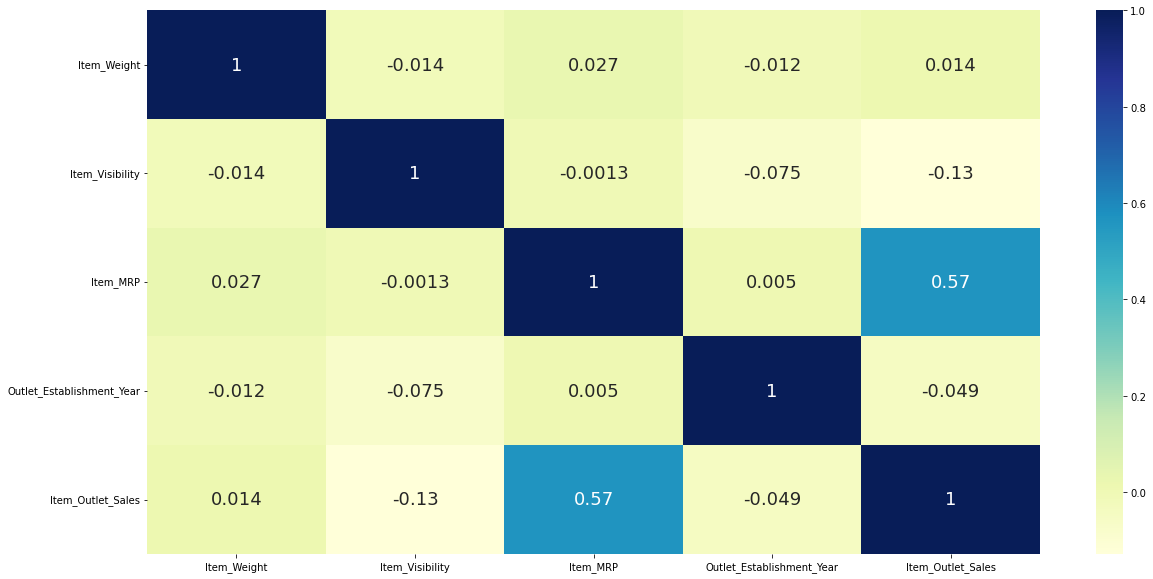

In [41]:
sns.heatmap(corr_data,annot=True,cmap="YlGnBu",annot_kws={"size":18})
plt.show()

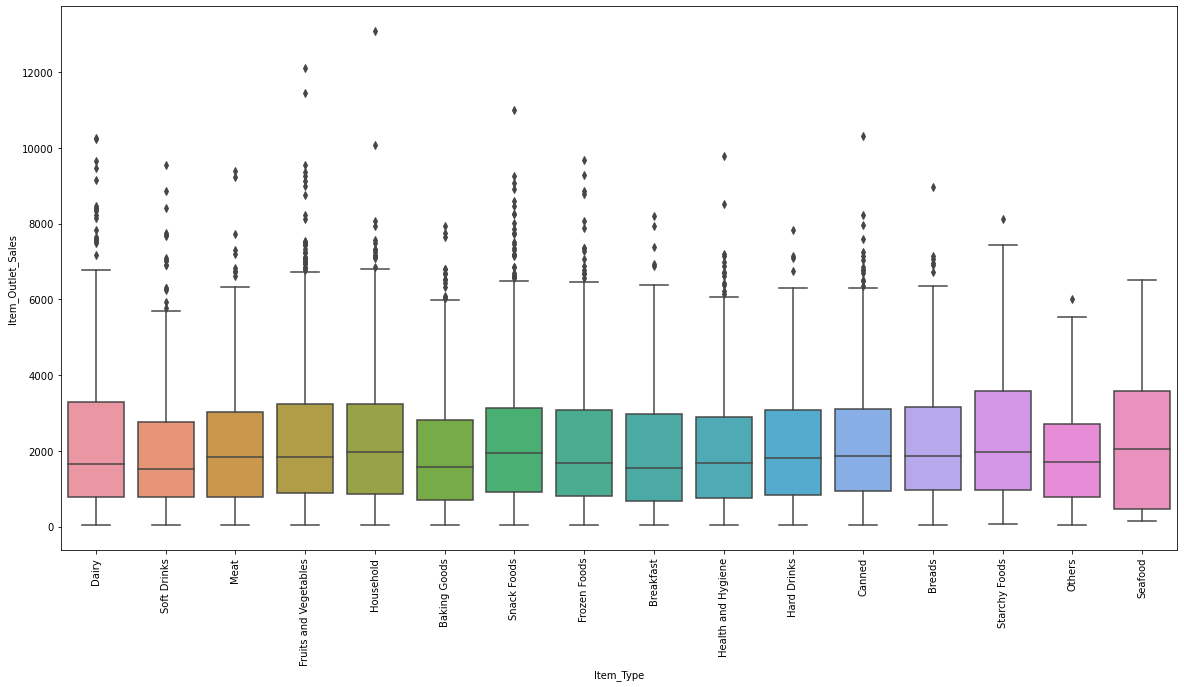

In [42]:
# Cat vs Num

# Item Type vs Sales
sns.boxplot(x="Item_Type",y="Item_Outlet_Sales",data=sales)
plt.xticks(rotation=90)
plt.show()

In [45]:
# Lets see seafood
sales.loc[sales.Item_Type=="Seafood","Item_Outlet_Sales"].describe()

count      64.000000
mean     2326.065928
std      1842.988719
min       149.805000
25%       473.383800
50%      2055.324600
75%      3589.327800
max      6503.534400
Name: Item_Outlet_Sales, dtype: float64

### Feature Engineering

In [47]:
sales["Item_ID_Cat"]=sales.Item_Identifier.str[0:2]

In [48]:
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [49]:
pd.crosstab(sales.Item_ID_Cat,sales.Item_Fat_Content)

Item_Fat_Content,Low Fat,Regular
Item_ID_Cat,,
DR,728,71
FD,3190,2935
NC,1599,0


In [23]:
# Non Edible

sales.loc[sales.Item_ID_Cat=="NC","Item_Fat_Content"]="Non Edible"

In [50]:
# Item Type

sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [51]:
perish=['Dairy','Meat', 'Fruits and Vegetables',
       'Breakfast',
       'Breads', 'Starchy Foods', 'Seafood']

In [27]:
def func(x):
    if x in perish:
        return("Perishable")
    else:
        return("Non_Perishable")

In [28]:
sales["Item_Type_Cat"]=sales.Item_Type.apply(func)

In [29]:
# Outlet_ID

sales.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [30]:
lowes=['OUT010','OUT019']
high=['OUT013','OUT027']

In [31]:
def outlets(x):
    if x in lowes:
        return("Low_Performers")
    elif x in high:
        return("High_Grossers")
    else:
        return("Avg_Performers")

In [58]:
sales["Out_Cat"]=sales.Outlet_Identifier.apply(outlets)

In [59]:
# Establishment Year....

sales["Vintage"]=2013 - sales.Outlet_Establishment_Year

In [60]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Out_Cat,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Performers,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Performers,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Performers,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Low_Performers,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,High_Grossers,26


### Missing Values

In [63]:
sales.loc[sales.Item_Identifier=='FDA15',"Item_Weight"]

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
Name: Item_Weight, dtype: float64

In [65]:
sales["Item_Weight"]=sales.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [66]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_ID_Cat                     0
Out_Cat                         0
Vintage                         0
dtype: int64

In [67]:
sales.loc[sales.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Out_Cat,Vintage
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,FD,High_Grossers,28
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,FD,High_Grossers,28
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,FD,High_Grossers,28
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,FD,Low_Performers,28


In [73]:
sales.loc[sales.Item_Identifier=="FDN52","Item_Weight"]

927   NaN
Name: Item_Weight, dtype: float64

In [74]:
sales.loc[sales.Item_Type=="Frozen Foods","Item_Weight"].mean()

12.782403508771965

In [75]:
sales.loc[(sales.Item_Type=="Frozen Foods") & (sales.Item_Weight.isnull()),"Item_Weight"]= 12.7824

In [76]:
sales.loc[sales.Item_Type=="Snack Foods","Item_Weight"].mean()

13.031230191826587

In [78]:
sales.loc[(sales.Item_Type=="Snack Foods") & (sales.Item_Weight.isnull()),"Item_Weight"]=13.0312 

In [79]:
sales.loc[sales.Item_Type=="Dairy","Item_Weight"].mean()

13.37990455212926

In [81]:
sales.loc[(sales.Item_Type=="Dairy") & (sales.Item_Weight.isnull()),"Item_Weight"]= 13.3799 

In [82]:
sales.loc[sales.Item_Type=="Baking Goods","Item_Weight"].mean()

12.28531684698612

In [83]:
sales.loc[(sales.Item_Type=="Baking Goods") & (sales.Item_Weight.isnull()),"Item_Weight"]= 12.2853 

In [84]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_ID_Cat                     0
Out_Cat                         0
Vintage                         0
dtype: int64

In [85]:
# Outlets

sales.groupby(["Outlet_Type","Outlet_Location_Type"])["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

In [92]:
# Find the DataFrame where Outlet size is missing

sales.loc[sales.Outlet_Size.isnull(),["Outlet_Location_Type","Outlet_Type"]]

,Outlet_Location_Type,Outlet_Type
3,Tier 3,Grocery Store
8,Tier 2,Supermarket Type1
9,Tier 2,Supermarket Type1
25,Tier 2,Supermarket Type1
28,Tier 3,Grocery Store
...,...,...
8502,Tier 2,Supermarket Type1
8508,Tier 2,Supermarket Type1
8509,Tier 3,Grocery Store
8514,Tier 2,Supermarket Type1


In [93]:
sales.loc[sales.Outlet_Size.isnull(),"Outlet_Size"]="Medium"

### Scaling & Transformation

In [116]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_ID_Cat', 'Out_Cat',
       'Vintage'],
      dtype='object')

In [117]:
# Drop the unnecessary vars...

finaldata=sales.drop(['Item_Identifier','Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year'],axis=1)

In [118]:
finaldata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Out_Cat,Vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Performers,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Performers,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Performers,14
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Low_Performers,15
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,High_Grossers,26


In [132]:
# Scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

finaldata["scaled_sales"]=sc.fit_transform(pd.DataFrame(finaldata.Item_Outlet_Sales))

In [140]:

sc=StandardScaler()

finaldata["scaled_MRP"]=sc.fit_transform(pd.DataFrame(finaldata.Item_MRP))
finaldata

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Out_Cat,Vintage,scaled_sales,scaled_MRP,scaled_weight,scaled_visible,scaled_vintage
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Performers,14,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Performers,4,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Performers,14,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,19.200,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Low_Performers,15,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,8.930,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,High_Grossers,26,-0.695373,-1.399220,-0.849437,-1.281758,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,High_Grossers,26,0.349915,1.180783,-1.294026,-0.181193,1.293934
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,FD,Avg_Performers,11,-0.956402,-0.527301,-0.967851,-0.371154,-0.497909
8520,10.600,Low Fat,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,Avg_Performers,9,-0.579100,-0.897208,-0.489891,-0.599784,-0.736822
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Avg_Performers,4,-0.196725,-0.607977,-1.219748,1.532880,-1.334103


In [134]:
sc=StandardScaler()

finaldata["scaled_weight"]=sc.fit_transform(pd.DataFrame(finaldata.Item_Weight))

In [135]:
sc=StandardScaler()

finaldata["scaled_visible"]=sc.fit_transform(pd.DataFrame(finaldata.Item_Visibility))

In [136]:
sc=StandardScaler()

finaldata["scaled_vintage"]=sc.fit_transform(pd.DataFrame(finaldata.Vintage))

In [141]:
finaldata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Out_Cat,Vintage,scaled_sales,scaled_MRP,scaled_weight,scaled_visible,scaled_vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Performers,14,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Performers,4,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Performers,14,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Low_Performers,15,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,High_Grossers,26,-0.695373,-1.399220,-0.849437,-1.281758,1.293934


In [142]:
# Lets drop the Original values

newdata=finaldata.drop(["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales","Vintage"],axis=1)

In [143]:
newdata.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_ID_Cat,Out_Cat,scaled_sales,scaled_MRP,scaled_weight,scaled_visible,scaled_vintage
0,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Avg_Performers,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,Regular,Medium,Tier 3,Supermarket Type2,DR,Avg_Performers,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Avg_Performers,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,Regular,Medium,Tier 3,Grocery Store,FD,Low_Performers,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,Low Fat,High,Tier 3,Supermarket Type1,NC,High_Grossers,-0.695373,-1.399220,-0.849437,-1.281758,1.293934


In [144]:
# Scaling the Outlet Size

newdata["Outlet_Size"]=newdata.Outlet_Size.map({"Small":1,"Medium":2,"High":3})

In [146]:
dummydata=pd.get_dummies(newdata,drop_first=True)

In [147]:
dummydata.head()

,Outlet_Size,scaled_sales,scaled_MRP,scaled_weight,scaled_visible,scaled_vintage,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_Cat_FD,Item_ID_Cat_NC,Out_Cat_High_Grossers,Out_Cat_Low_Performers
0,2,0.910601,1.747454,-0.769777,-0.970732,-0.139541,0,0,0,1,0,0,1,0,0,0
1,2,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103,1,0,1,0,1,0,0,0,0,0
2,2,-0.049238,0.010040,0.995659,-0.956917,-0.139541,0,0,0,1,0,0,1,0,0,0
3,2,-0.849103,0.660050,1.361665,-1.281758,-0.020085,1,0,1,0,0,0,1,0,0,1
4,3,-0.695373,-1.399220,-0.849437,-1.281758,1.293934,0,0,1,1,0,0,0,1,1,0


In [153]:
dummydata.shape

(8523, 16)